Make the graph on the right! You will need to make use of 2 conditional edges!
Input. initial_state = AgentState(number1 = 10, operation="-",
number2 = 5, number3 = 7, number4=2, operation2="+",
finalNumber= O, finalNumber2 = O)

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

In [2]:
class AgentState(TypedDict):
    number1: int
    operation1: str
    number2: int
    final_result1: float
    number3: int
    operation2: str
    number4: int
    final_result2: float

In [17]:
# Conditional agent function
# These agents performs an operation based on the 'operation' field in the state.
def addition_agent1(state: AgentState) -> AgentState:
    """Agent that adds two numbers."""
    result = state["number1"] + state["number2"]
    state["final_result1"] = result
    return state

def subtraction_agent1(state: AgentState) -> AgentState:
    """Agent that subtracts two numbers."""
    result = state["number1"] - state["number2"]
    state["final_result1"] = result
    return state

def addition_agent2(state: AgentState) -> AgentState:
    """Agent that adds two numbers."""
    result = state["number1"] + state["number2"]
    state["final_result2"] = result
    return state

def subtraction_agent2(state: AgentState) -> AgentState:
    """Agent that subtracts two numbers."""
    result = state["number3"] - state["number4"]
    state["final_result2"] = result
    return state

In [18]:
def decision_agent1(state: AgentState) -> AgentState:
    """Decides the next node based on the operation."""
    
    match state["operation1"]:
        case "+":
            return "addition_agent1"
        case "-":
            return "subtraction_agent1"

def decision_agent2(state: AgentState) -> AgentState:
    """Decides the next node based on the operation."""
    
    match state["operation2"]:
        case "+":
            return "addition_agent2"
        case "-":
            return "subtraction_agent2"

In [19]:
graph = StateGraph(AgentState)

# Add the nodes to the graph
graph.add_node("addition_agent1", addition_agent1)
graph.add_node("subtraction_agent1", subtraction_agent1)

graph.add_node("addition_agent2", addition_agent2)
graph.add_node("subtraction_agent2", subtraction_agent2)

# Decision making node
# graph.add_node("router", decide_next_node)    # This won't work as intended
graph.add_node("router1", lambda state: state) # passthrough node (function)
graph.add_node("router2", lambda state: state) # passthrough node (function)

# Add edges
graph.add_edge(START, "router1")
# Add conditional edges from router to each agent
graph.add_conditional_edges(
    "router1", # source node
    decision_agent1, # decision function which will return the next node name
    ["addition_agent1", "subtraction_agent1"]   # if the name returned by decision function are same to node names
)

graph.add_edge("addition_agent1", "router2")
graph.add_edge("subtraction_agent1", "router2")

graph.add_conditional_edges(
    "router2", # source node
    decision_agent2, # decision function which will return the next node name
    ["addition_agent2", "subtraction_agent2"]   # if the name returned by decision function are same to node names
)

graph.add_edge("addition_agent2", END)
graph.add_edge("subtraction_agent2", END)

# Compile the graph
app = graph.compile()

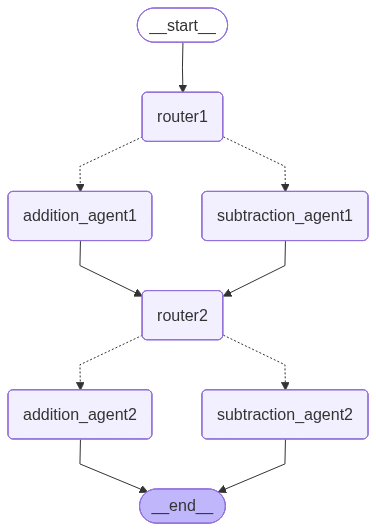

In [8]:
display(Image(app.get_graph().draw_mermaid_png()))

In [20]:
initial_state: AgentState = {
    "number1": 10,
    "number2": 5,
    "operation1": "+",
    "number3": 20,
    "number4": 8,
    "operation2": "-"
}

final_state = app.invoke(initial_state)
print(final_state)

{'number1': 10, 'operation1': '+', 'number2': 5, 'final_result1': 15, 'number3': 20, 'operation2': '-', 'number4': 8, 'final_result2': 12}
